# Chapter 3
# Data formats and handling
_Version: February 14, 2022, see_ [PyEcon.org](https://pyecon.org).

The package pandas is a free software library for Python including the following functions:
- Data manipulation and analysis
- DataFrame objects and Series
- Export and import data from files and web
- Handling of missing data

Provides high-performance data structures and data analysis tools.

## Section 3.1
## Pandas package

### Motivation

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

[*********************100%%**********************]  5 of 5 completed


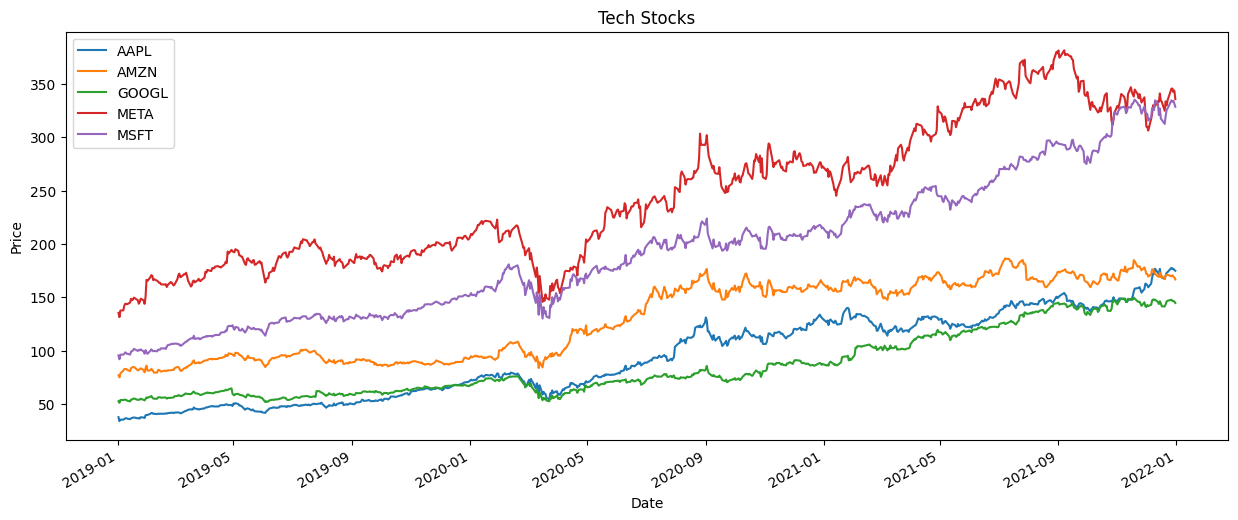

In [3]:
# Download data
tickers = ["AAPL", "MSFT", "GOOGL", "AMZN", "META"]
data = yf.download(tickers, start="2019-01-01", end="2022-01-01")
close = data["Adj Close"]

# Plot the data
close.plot(figsize=(15, 6))
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Tech Stocks")
plt.legend()

# Save the figure
plt.savefig("out/tech_stocks.pdf", format="pdf")

Calculando o retorno diario

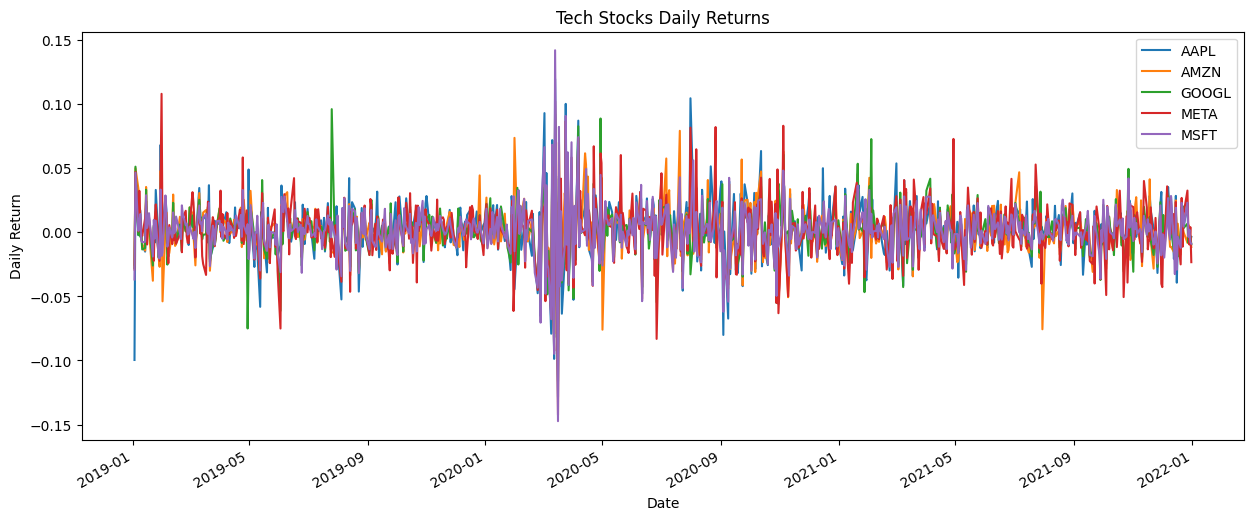

In [25]:
retorno_diario = close.pct_change()

retorno_diario.plot(figsize=(15, 6))

plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.title("Tech Stocks Daily Returns")
plt.legend()

# Show the plot
plt.show()


Podemos visualizar isso separadamente

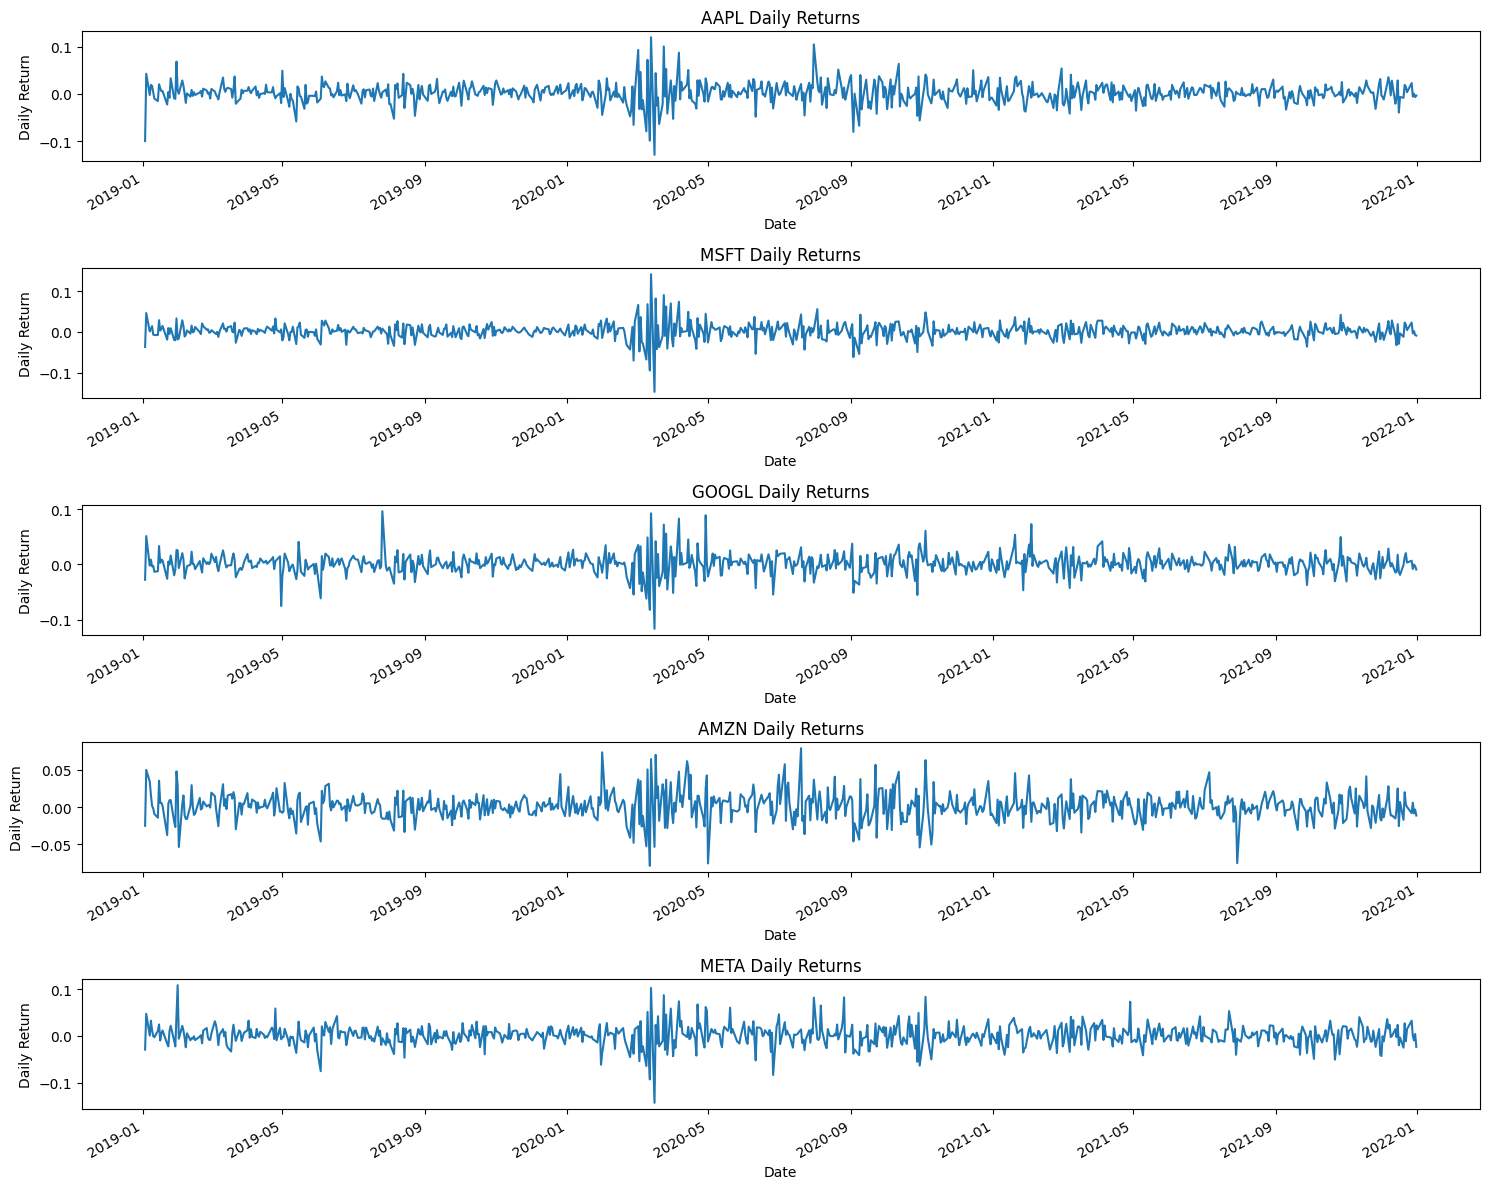

In [28]:
fig, axes = plt.subplots(nrows=len(tickers), ncols=1, figsize=(15, 12))

# Plot each stock's daily returns in a separate subplot
for i, ticker in enumerate(tickers):
    retorno_diario[ticker].plot(ax=axes[i])
    axes[i].set_xlabel("Date")
    axes[i].set_ylabel("Daily Return")
    axes[i].set_title(f"{ticker} Daily Returns")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

Podemos calcular o retorno total de cada ação desse intervalo na seguinte forma

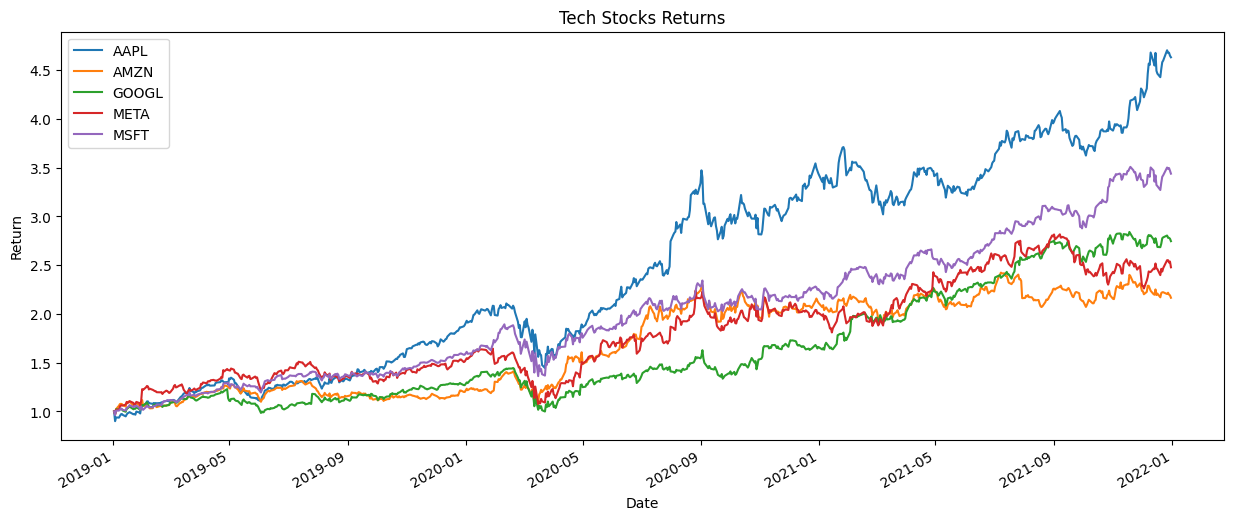

In [26]:
retorno = close/close.iloc[0]

retorno.plot(figsize=(15, 6))

plt.xlabel("Date")
plt.ylabel("Return")
plt.title("Tech Stocks Returns")
plt.legend()

# Show the plot
plt.show()

In [4]:
data

Price        Adj Close                                                  \
Ticker            AAPL        AMZN       GOOGL        META        MSFT   
Date                                                                     
2019-01-02   37.750080   76.956497   52.673550  135.401749   95.501312   
2019-01-03   33.989906   75.014000   51.214722  131.469833   91.988029   
2019-01-04   35.440907   78.769501   53.841705  137.667099   96.266296   
2019-01-07   35.362022   81.475502   53.734329  137.766891   96.389084   
2019-01-08   36.036125   82.829002   54.206287  142.237717   97.087975   
...                ...         ...         ...         ...         ...   
2021-12-27  177.618866  169.669495  147.736938  345.470062  334.461151   
2021-12-28  176.594513  170.660995  146.518845  345.510010  333.289185   
2021-12-29  176.683182  169.201004  146.486877  342.236725  333.972900   
2021-12-30  175.520874  168.644501  146.032898  343.653809  331.404266   
2021-12-31  174.900391  166.716995  144.685944  335.660248  328.474213   

Price            Close                                                  ...  \
Ticker            AAPL        AMZN       GOOGL        META        MSFT  ...   
Date                                                                    ...   
2019-01-02   39.480000   76.956497   52.734001  135.679993  101.120003  ...   
2019-01-03   35.547501   75.014000   51.273499  131.740005   97.400002  ...   
2019-01-04   37.064999   78.769501   53.903500  137.949997  101.930000  ...   
2019-01-07   36.982498   81.475502   53.796001  138.050003  102.059998  ...   
2019-01-08   37.687500   82.829002   54.268501  142.529999  102.800003  ...   
...                ...         ...         ...         ...         ...  ...   
2021-12-27  180.330002  169.669495  147.906494  346.179993  342.450012  ...   
2021-12-28  179.289993  170.660995  146.686996  346.220001  341.250000  ...   
2021-12-29  179.380005  169.201004  146.654999  342.940002  341.950012  ...   
2021-12-30  178.199997  168.644501  146.200500  344.359985  339.320007  ...   
2021-12-31  177.570007  166.716995  144.852005  336.350006  336.320007  ...   

Price             Open                                                  \
Ticker            AAPL        AMZN       GOOGL        META        MSFT   
Date                                                                     
2019-01-02   38.722500   73.260002   51.360001  128.990005   99.550003   
2019-01-03   35.994999   76.000504   52.533501  134.690002  100.099998   
2019-01-04   36.132500   76.500000   52.127998  134.009995   99.720001   
2019-01-07   37.174999   80.115501   54.048500  137.559998  101.639999   
2019-01-08   37.389999   83.234497   54.299999  139.889999  103.040001   
...                ...         ...         ...         ...         ...   
2021-12-27  177.089996  171.037003  147.255997  338.850006  335.459991   
2021-12-28  180.160004  170.182495  148.235992  346.630005  343.149994   
2021-12-29  179.330002  170.839996  146.644501  346.910004  341.299988   
2021-12-30  179.470001  169.699997  146.694000  344.000000  341.910004   
2021-12-31  178.089996  168.955994  146.050003  343.019989  338.510010   

Price          Volume                                           
Ticker           AAPL       AMZN     GOOGL      META      MSFT  
Date                                                            
2019-01-02  148158800  159662000  31868000  28146200  35329300  
2019-01-03  365248800  139512000  41960000  22717900  42579100  
2019-01-04  234428400  183652000  46022000  29002100  44060600  
2019-01-07  219111200  159864000  47446000  20089300  35656100  
2019-01-08  164101200  177628000  35414000  26263800  31514400  
...               ...        ...       ...       ...       ...  
2021-12-27   74919600   58688000  15976000  17795000  19947000  
2021-12-28   79144300   54638000  18200000  16637600  15661500  
2021-12-29   62348900   35754000  17788000  10747000  15042000  
2021-12-30   59773000   37584000  15688

## Section 3.2
## DataFrame

### Creating a DataFrame

In [5]:
data = {"company": ["Daimler", "E.ON", "Siemens", "BASF", "BMW"],
        "price": [69.2, 8.11, 110.92, 87.28, 87.81],
        "volume": [4456290, 3667975, 3669487, 1778058, 1824582]}
frame = pd.DataFrame(data)
frame

,company,price,volume
0,Daimler,69.20,4456290
1,E.ON,8.11,3667975
2,Siemens,110.92,3669487
3,BASF,87.28,1778058
4,BMW,87.81,1824582


### Print DataFrame

In [6]:
frame2 = pd.DataFrame(data, columns=["company", "volume",
                                     "price", "change"])
frame2

,company,volume,price,change
0,Daimler,4456290,69.20,NaN
1,E.ON,3667975,8.11,NaN
2,Siemens,3669487,110.92,NaN
3,BASF,1778058,87.28,NaN
4,BMW,1824582,87.81,NaN


### Add data to DataFrame

In [7]:
frame2["change"] = [1.2, -3.2, 0.4, -0.12, 2.4]
frame2["change"]

0    1.20
1   -3.20
2    0.40
3   -0.12
4    2.40
Name: change, dtype: float64

In [8]:
frame2

,company,volume,price,change
0,Daimler,4456290,69.20,1.20
1,E.ON,3667975,8.11,-3.20
2,Siemens,3669487,110.92,0.40
3,BASF,1778058,87.28,-0.12
4,BMW,1824582,87.81,2.40


### Indexing DataFrames

In [9]:
frame2[["company", "change"]]

,company,change
0,Daimler,1.20
1,E.ON,-3.20
2,Siemens,0.40
3,BASF,-0.12
4,BMW,2.40


### DataFrame delete column

In [10]:
del frame2["volume"]
frame2


,company,price,change
0,Daimler,69.20,1.20
1,E.ON,8.11,-3.20
2,Siemens,110.92,0.40
3,BASF,87.28,-0.12
4,BMW,87.81,2.40


In [11]:
frame2.columns

Index(['company', 'price', 'change'], dtype='object')

### Naming properties

In [12]:
frame2.index.name = "number:"
frame2.columns.name = "feature:"
frame2

feature:,company,price,change
number:,,,
0,Daimler,69.20,1.20
1,E.ON,8.11,-3.20
2,Siemens,110.92,0.40
3,BASF,87.28,-0.12
4,BMW,87.81,2.40


### Reindexing

In [13]:
frame3 = frame.reindex([0, 2, 3, 4])
frame3

,company,price,volume
0,Daimler,69.20,4456290
2,Siemens,110.92,3669487
3,BASF,87.28,1778058
4,BMW,87.81,1824582


### Filling missing values

In [14]:
frame4 = frame.reindex(index=[0, 2, 3, 4, 5], fill_value=0,
                       columns=["company", "price", "market cap"])
frame4

,company,price,market cap
0,Daimler,69.20,0
2,Siemens,110.92,0
3,BASF,87.28,0
4,BMW,87.81,0
5,0,0.00,0


In [16]:
import numpy as np

In [17]:

frame4 = frame.reindex(index=[0, 2, 3, 4], fill_value=np.nan,
                       columns=["company", "price", "market cap"])
frame4

,company,price,market cap
0,Daimler,69.20,NaN
2,Siemens,110.92,NaN
3,BASF,87.28,NaN
4,BMW,87.81,NaN


### Filling NaN

In [18]:
frame4[:3]

,company,price,market cap
0,Daimler,69.20,NaN
2,Siemens,110.92,NaN
3,BASF,87.28,NaN


In [19]:

frame4.fillna(1000000, inplace=True)
frame4[:3]

,company,price,market cap
0,Daimler,69.20,1000000.0
2,Siemens,110.92,1000000.0
3,BASF,87.28,1000000.0


### Dropping index

In [21]:
frame5 = frame
frame5
frame5.drop([1, 2])

,company,price,volume
0,Daimler,69.20,4456290
3,BASF,87.28,1778058
4,BMW,87.81,1824582


### Dropping column

In [22]:
frame5[:2]

,company,price,volume
0,Daimler,69.20,4456290
1,E.ON,8.11,3667975


In [23]:
frame5.drop("price", axis=1)[:3]

,company,volume
0,Daimler,4456290
1,E.ON,3667975
2,Siemens,3669487


In [24]:
frame5.drop(2, axis=0)

,company,price,volume
0,Daimler,69.20,4456290
1,E.ON,8.11,3667975
3,BASF,87.28,1778058
4,BMW,87.81,1824582


### Indexing

In [ ]:
frame

In [ ]:
frame[2:]

### Indexing

In [25]:
frame6 = pd.DataFrame(data, index=["a", "b", "c", "d", "e"])
frame6

,company,price,volume
a,Daimler,69.20,4456290
b,E.ON,8.11,3667975
c,Siemens,110.92,3669487
d,BASF,87.28,1778058
e,BMW,87.81,1824582


In [26]:
frame6["b":"d"]

,company,price,volume
b,E.ON,8.11,3667975
c,Siemens,110.92,3669487
d,BASF,87.28,1778058


### Selection with loc and iloc

In [ ]:
frame6.loc["c", ["company", "price"]]
frame6.iloc[2, [0, 1]]

### Selection with loc and iloc

In [ ]:
frame6.loc[["c", "d", "e"], ["volume", "price", "company"]]

In [ ]:
frame6.iloc[2:, ::-1]

### Multiindex

In [ ]:
ind = [["a", "a", "a", "b", "b"], [1, 2, 3, 1, 2]]
frame6 = pd.DataFrame(np.arange(15).reshape((5, 3)), index=ind,
                      columns=["first", "second", "third"])
frame6

In [ ]:
frame6.index.names = ["index1", "index2"]
frame6.index

### Selecting of a multiindex

In [ ]:
frame6.loc["a"]


In [ ]:
frame6.loc["b", 1]

### Series and DataFrames

In [ ]:
frame7 = frame[["price", "volume"]]
frame7.index = ["Daimler", "E.ON", "Siemens", "BASF", "BMW"]
series = frame7.iloc[2]
frame7

In [ ]:
series

### Operations between Series and DataFrames down the rows

In [ ]:
frame7 + series

### Pandas vs Numpy

In [ ]:
nparr = np.arange(12.).reshape((3, 4))
row = nparr[0]
nparr - row

### Numpy functions on DataFrames

In [ ]:
frame7[:2]

In [ ]:
frame7.apply(np.mean)

In [ ]:
frame7.apply(np.sqrt)[:2]

### Groupby

In [ ]:
vote = pd.read_csv("data/vote.csv")[["Party", "Member", "Vote"]]
vote.head()

### Groupby

In [ ]:
res = vote.groupby(["Party", "Vote"]).count()
res

## Section 3.4
## Import/Export data

### Read comma-separated values

In [ ]:
df = pd.read_csv("data/ex1.csv")
df

### Read table values

In [ ]:
df = pd.read_table("data/tab.txt", sep="|")
df

### Read CSV and header settings

In [ ]:
df = pd.read_csv("data/ex2.csv", header=None)
df

### Read CSV and header names

In [ ]:
df = pd.read_csv("data/ex2.csv",
                 names=["a", "b", "c", "d", "hello"])
df

### Read CSV and specify index

In [ ]:
df = pd.read_csv("data/ex2.csv",
                 names=["a", "b", "c", "d", "hello"],
                 index_col="hello")
df

### Read CSV and choose rows

In [ ]:
df = pd.read_csv("data/ex3.csv", skiprows=[1, 3])
df

### Write to CSV

In [ ]:
df = pd.read_csv("data/ex3.csv", skiprows=[1, 3])
df.to_csv("out/out1.csv")

### Write to CSV and settings

In [ ]:
df = pd.read_csv("data/ex3.csv", skiprows=[1, 3])
df.to_csv("out/out2.csv", index=False, header=False)

### Write to CSV and specify header

In [ ]:
df = pd.read_csv("data/ex3.csv", skiprows=[1, 3, 4])
df.to_csv("out/out3.csv", index=False,
          header=["a", "b", "c", "d", "e"])

### Reading Excel

In [ ]:
xls_frame = pd.read_excel("data/goog.xls")

### Excel as a DataFrame

In [ ]:
xls_frame[["Adj Close", "Volume", "High"]]

### Import pandas-datareader

In [ ]:
from pandas_datareader import data

### Get data of Ford

In [ ]:
ford = data.DataReader("F", "yahoo", "2020-01-01", "2020-01-31")
ford.head()[["Close", "Volume"]]

### Explore Ford dataset

In [ ]:
ford.index
ford.loc["2020-01-28"]

### Download and explore SAP data

In [ ]:
sap = data.DataReader("SAP", "yahoo", "2020-01-01", "2020-06-30")
sap[25:27]
sap.loc["2020-03-09"]

### Eurostat

In [ ]:
population = data.DataReader("tps00001", "eurostat", "2010-01-01",
                             "2020-01-01")
population.columns
population["Population on 1 January - total", "France"][-5:]

### Beautiful Soup

In [ ]:
from bs4 import BeautifulSoup
import requests
url = "www.uni-goettingen.de/de/applied-econometrics/412565.html"
r = requests.get("https://" + url)
d = r.text
soup = BeautifulSoup(d, "lxml")
soup.title

### Bollinger

In [ ]:
sap = data.DataReader("SAP", "yahoo", "2019-01-01", "2020-08-31")
sap.index = pd.to_datetime(sap.index)
boll = sap["Close"].rolling(window=20, center=False).mean()
std = sap["Close"].rolling(window=20, center=False).std()
upp = boll + std * 2
low = boll - std * 2
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
boll.plot(ax=ax, label="20 days Rolling mean")
upp.plot(ax=ax, label="Upper Band")
low.plot(ax=ax, label="Lower Band")
sap["Close"].plot(ax=ax, label="SAP Price")
ax.legend(loc="best")
fig.savefig("out/boll.pdf")